Note: You will need Julia v1.9 to run this notebook.

In [7]:
using Integrals

using Plots
using LaTeXStrings

# Integral
$$ \int_0^z \frac{d z}{[\Omega(1+z)^3 + (1-\Omega)(1+z)^{3/2}]^{1/2}} $$

# Function definition

In [8]:
f(z, Ω) = (Ω*(1+z)^3 + (1-Ω)*(1+z)^(3/2))^(-1/2)

f (generic function with 1 method)

In [9]:
Ω = 0
prob = IntegralProblem(f, 0, 1, Ω)
sol = solve(prob, QuadGKJL()).u

0.7568284600108843

In [10]:
integral(z, Ω) = solve(IntegralProblem((z, Ω) -> f(z, Ω), 0.0, z, Ω), QuadGKJL()).u

integral (generic function with 1 method)

# Plot

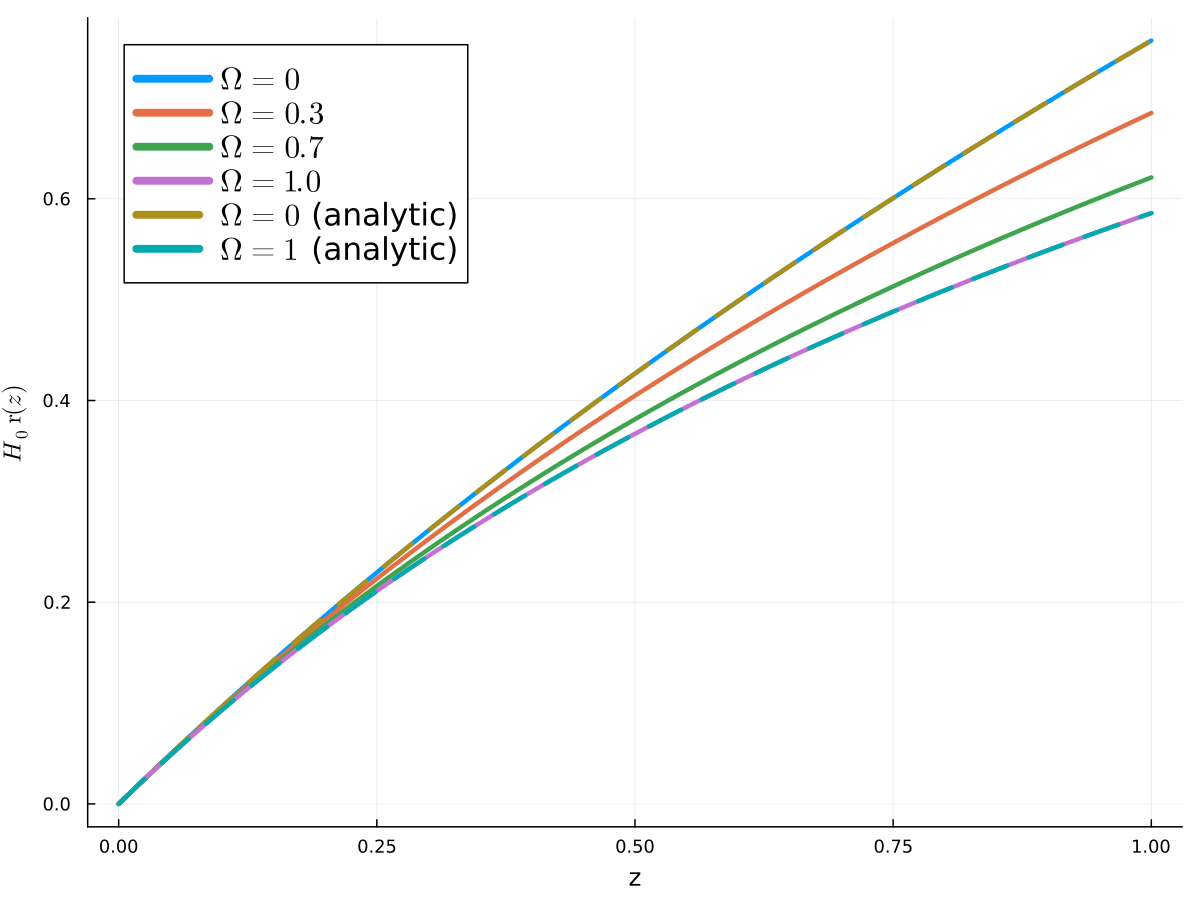

In [43]:
z = 0:0.01:1.0
y = [integral.(z, Ω) for Ω in [0, 0.3, 0.7, 1.0]]

A_Ω0(z) = 4*(1+z)^(1/4) - 4
A_Ω1(z) = -2/(1+z)^(1/2) + 2

plot(legendfontsize=14, dpi=150; size=(800,600),
      xlabel="z", ylabel=L"H_0 \; \mathrm{r}(z)")
plot!(z, y, 
    label=[L"\Omega=0" L"\Omega=0.3" L"\Omega=0.7" L"\Omega=1.0"], linewidth=3)
plot!(z, A_Ω0.(z), line=:dash, linewidth=3, label=L"\Omega=0"*" (analytic)")
plot!(z, A_Ω1.(z), line=:dash, linewidth=3, label=L"\Omega=1"*" (analytic)")


In [44]:
savefig("plot.png");